In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/train"
test_ds="/kaggle/input/traffic-net/trafficnet_dataset_v1/test"


In [4]:
os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/train')

['fire', 'sparse_traffic', 'accident', 'dense_traffic']

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [6]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
train_generator[0][0].shape

(32, 224, 224, 3)

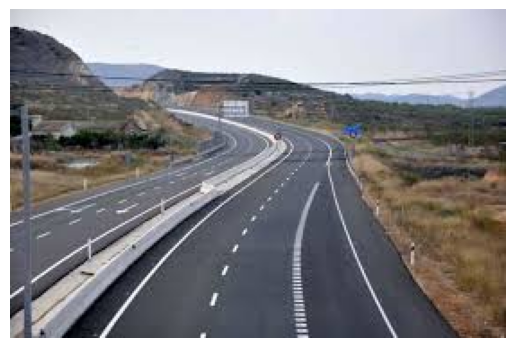

In [9]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/traffic-net/trafficnet_dataset_v1/test/sparse_traffic/images_008.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
img= train_generator[0]
print(img)

(array([[[[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [121.56531   ,  17.741852  ,   3.5059013 ],
         [153.30295   ,  26.315075  ,  13.775246  ],
         [188.2548    ,  38.193855  ,  27.743923  ]],

        [[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [138.84012   ,  23.605944  ,   2.8104014 ],
         [169.74417   ,  31.836235  ,  15.293598  ],
         [197.67863   ,  40.104343  ,  28.891489  ]],

        [[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [164.40712   ,  28.289444  ,   0.27636674],
         [185.12553   ,  35.641502  ,   3.7119234 ],
         [193.6674    ,  38.518818  ,   8.536394  ]]

In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [12]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 4)


In [13]:
print(len(train_generator))
print(len(test_ds))

113
52


In [14]:
from keras.layers import MaxPool2D

In [15]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [16]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [18]:
import tensorflow.keras as keras

In [20]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
113/113 [==============================] - 90s 644ms/step - loss: 1.2302 - accuracy: 0.4628 - val_loss: 1.1619 - val_accuracy: 0.4950
Epoch 2/20
113/113 [==============================] - 62s 546ms/step - loss: 0.9474 - accuracy: 0.6031 - val_loss: 1.0557 - val_accuracy: 0.5987
Epoch 3/20
113/113 [==============================] - 62s 543ms/step - loss: 0.8289 - accuracy: 0.6561 - val_loss: 0.7675 - val_accuracy: 0.6950
Epoch 4/20
113/113 [==============================] - 62s 545ms/step - loss: 0.7661 - accuracy: 0.6892 - val_loss: 0.7211 - val_accuracy: 0.7175
Epoch 5/20
113/113 [==============================] - 61s 537ms/step - loss: 0.7169 - accuracy: 0.7194 - val_loss: 0.6985 - val_accuracy: 0.7375
Epoch 6/20
113/113 [==============================] - 62s 543ms/step - loss: 0.6533 - accuracy: 0.7458 - val_loss: 0.6413 - val_accuracy: 0.7425
Epoch 7/20
113/113 [==============================] - 62s 549ms/step - loss: 0.6075 - accuracy: 0.7756 - val_loss: 0.6097 - val_ac

In [22]:
n_categories = len(os.listdir('/kaggle/input/traffic-net/trafficnet_dataset_v1/test'))# number of categories print(n_categories)
n_categories

4

In [24]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.230167,0.462778,1.161882,0.49500
1,0.947428,0.603056,1.055705,0.59875
2,0.828945,0.656111,0.767523,0.69500
3,0.766110,0.689167,0.721144,0.71750
4,0.716870,0.719444,0.698467,0.73750


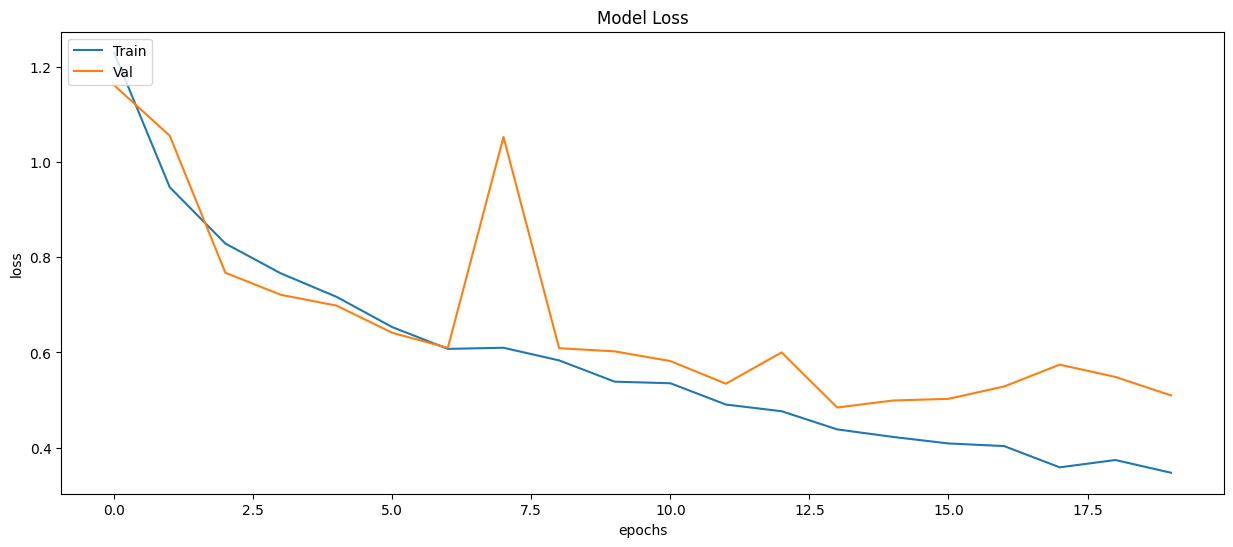

In [25]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

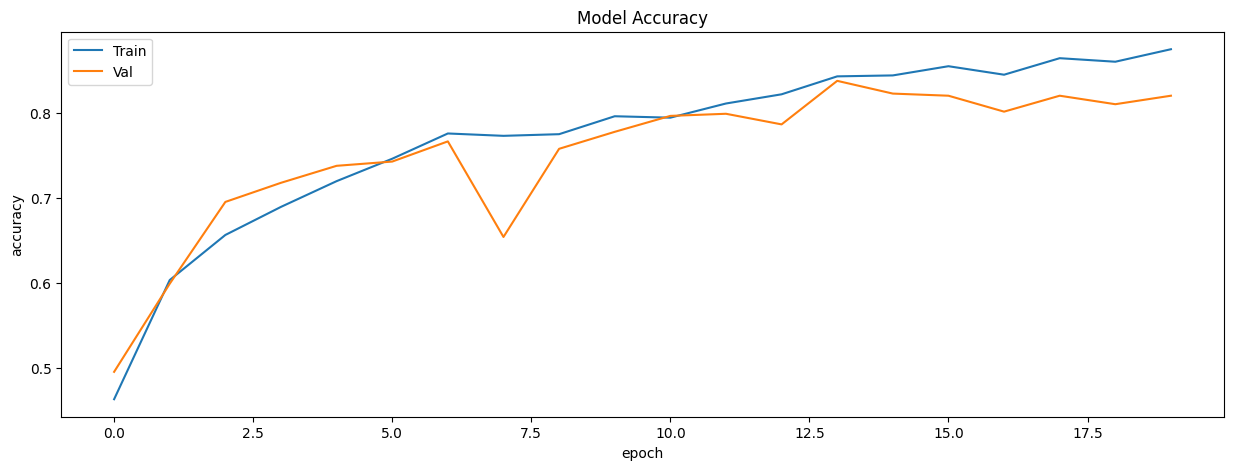

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

25/25 [==============================] - 3s 124ms/step


In [28]:
results =model.evaluate(test_generator)

25/25 [==============================] - 3s 128ms/step - loss: 0.5097 - accuracy: 0.8200


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       200
           1       0.81      0.84      0.83       200
           2       0.95      0.85      0.90       200
           3       0.75      0.81      0.78       200

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



7/7 [==============================] - 1s 127ms/step


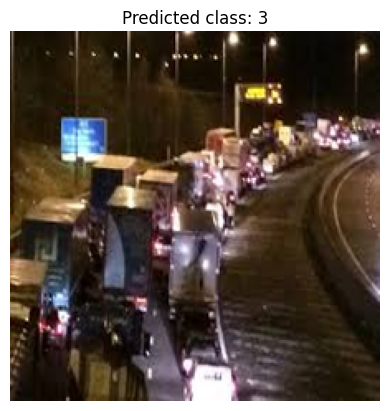

In [32]:

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/traffic-net/trafficnet_dataset_v1/test/dense_traffic'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [33]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : g
Class probability: 0.6943414
Predicted class for 2.jpg : g
Class probability: 0.6740869
Predicted class for 3.jpg : g
Class probability: 0.6865892
Predicted class for 4.jpg : g
Class probability: 0.6998085
Predicted class for 5.jpg : g
Class probability: 0.6863708
Predicted class for 6.jpg : g
Class probability: 0.7059452
Predicted class for 7.jpg : g
Class probability: 0.6964113
Predicted class for 8.jpg : g
Class probability: 0.6997777
Predicted class for 9.jpg : g
Class probability: 0.68478125
Predicted class for 10.jpg : g
Class probability: 0.7045417
Predicted class for 11.jpg : g
Class probability: 0.7113338
Predicted class for 12.jpg : g
Class probability: 0.6947735
Predicted class for 13.jpg : g
Class probability: 0.68125194
Predicted class for 14.jpg : g
Class probability: 0.679056
Predicted class for 15.jpg : g
Class probability: 0.7234279
Predicted class for 16.jpg : g
Class probability: 0.6798928
Predicted class for 17.jpg : g
Class probability